## Some Important Series Methods

In [1]:
# value_counts
# sort_values
# rank
# sort index
# set index
# rename index -> rename
# reset index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest ->nsmallest
# inert
# copy


In [2]:
import numpy as np
import pandas as pd

In [3]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
Name: count, dtype: int64

In [70]:
# value_counts(series and dataframe)
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
    ], columns=['iq', 'marks', 'package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [5]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [6]:
ipl = pd.read_csv(r'D:\Code Playground\Python for ML\DSMP_2\Pandas\dataset-session-17\ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [7]:
# Find which player has won most potm -> in finals & qualifiers
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
F du Plessis         3
SK Raina             3
KA Pollard           3
JJ Bumrah            2
AB de Villiers       2
MK Pandey            2
M Vijay              2
A Kumble             2
YK Pathan            2
SR Watson            2
HH Pandya            1
RM Patidar           1
JC Buttler           1
RR Pant              1
KS Williamson        1
MP Stoinis           1
TA Boult             1
SP Narine            1
RD Gaikwad           1
VR Iyer              1
DA Miller            1
Washington Sundar    1
NM Coulter-Nile      1
KV Sharma            1
BCJ Cutting          1
KH Pandya            1
SA Yadav             1
Rashid Khan          1
AD Russell           1
RG Sharma            1
A Nehra              1
DA Warner            1
MC Henriques         1
Harbhajan Singh      1
BJ Hodge             1
UT Yadav             1
V Sehwag             1
MS Bisla             1
MEK Hussey           1
CH Gayle             1
MS Dhoni             1
MM Patel             1
DE Bollinger      

<Axes: ylabel='count'>

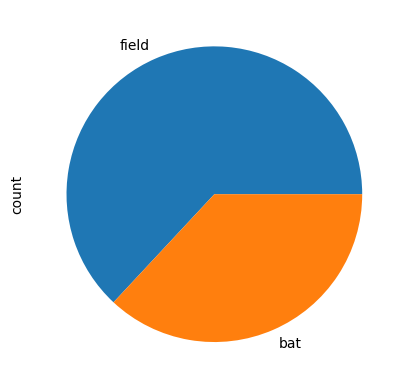

In [8]:
# toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [9]:
# how many matches each team has played
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [10]:
# sort_values (series & dataframe) -> ascending -> na_position -> inplace -> multiple cols
x = pd.Series([12,13,1,46,89])
x

0    12
1    13
2     1
3    46
4    89
dtype: int64

In [11]:
x.sort_values(ascending=False)

4    89
3    46
1    13
0    12
2     1
dtype: int64

In [12]:
movies = pd.read_csv(r'D:\Code Playground\Python for ML\DSMP_2\Pandas\dataset-session-17\movies.csv')
movies.head(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)


In [13]:
movies.sort_values('title_x', ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


In [107]:
students = pd.DataFrame(
    {
    'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
    'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
    'branch':['eee', 'it', 'cse', np.nan, 'me', 'ce', 'civ', 'cse', 'bio', np.nan],
    'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
    'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [15]:
students.sort_values('name')

,name,college,branch,cgpa,package
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [16]:
students.sort_values('name', na_position='first', ascending=False, inplace=True)
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [17]:
movies.sort_values(['year_of_release', 'title_x'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN


In [18]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [19]:
movies.sort_values(['year_of_release', 'title_x'], ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [20]:
# rank(series)
batsman = pd.read_csv(r'D:\Code Playground\Python for ML\DSMP_2\Pandas\dataset-session-17\batsman_runs_ipl.csv')
batsman.sample(5)


,batter,batsman_run
574,VH Zol,29
448,RS Sodhi,4
408,R Dhawan,190
464,S Gopal,180
148,DL Chahar,79


In [21]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
570,V Pratap Singh,0,594.0
63,Abdur Razzak,0,594.0
562,U Kaul,0,594.0
65,Akash Deep,0,594.0


In [22]:
# sort_index(series and dataframe)

In [23]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}
marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [24]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [25]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [26]:
# set_index(dataframe) -> inplace
batsman

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [27]:
batsman.set_index('batter', inplace=True)

In [28]:
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [29]:
# reset_index(series + dataframe) -> drop parameter
batsman.reset_index()

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [30]:
# how to replace existing index without loosing
batsman.reset_index().set_index('batting_rank')

,batter,batsman_run
batting_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


In [31]:
# batsman.drop(columns=["index"], inplace=True)

In [32]:
# series to dataframe using reset_index
print(type(marks_series))
marks_series

<class 'pandas.core.series.Series'>


maths       67
english     57
science     89
hindi      100
dtype: int64

In [33]:
type(marks_series.reset_index())

pandas.core.frame.DataFrame

In [34]:
# rename (dataframe) -> index
movies.set_index('title_x', inplace=True)

In [35]:
movies.sample(2)

,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Inteha (2003 film),tt0385782,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Inteha_(2003_film),Inteha,Inteha,0,2003,155,Drama|Thriller,5.3,131,Tina Saxena lives a wealthy life-style with he...,Tina Saxena lives a wealthy life-style with he...,One of them will die.,Ashmit Patel|Vidya Malvade|Nauheed Cyrusi|,1 nomination,24 October 2003 (India)
Fight Club – Members Only,tt0456413,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Fight_Club_%E2%8...,Fight Club: Members Only,Fight Club: Members Only,0,2006,140,Action|Crime,3.2,1260,Four friends Vicky Karan Somil and Diku is a...,Four college friends starts an underground fig...,Members only,Sunil Shetty|Sohail Khan|Zayed Khan|Dino Morea...,NaN,17 February 2006 (India)


In [36]:
movies.rename(columns={'imdb_id':'imdb', 'poster_path':'link'}, inplace=True)

In [37]:
movies.head(2)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [38]:
movies.rename(index={'Uri: The Surgical Strike': 'Uri', 'Battalion 609':'Battalion'}).head(2)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [39]:
# Unique(series)
temp = pd.Series([1,1,2,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)
temp.unique()

0     1.0
1     1.0
2     2.0
3     2.0
4     2.0
5     3.0
6     3.0
7     4.0
8     4.0
9     5.0
10    5.0
11    NaN
12    NaN
dtype: float64


array([ 1.,  2.,  3.,  4.,  5., nan])

In [40]:
ipl['Season'].unique().shape

(15,)

In [41]:
len(ipl['Season'].unique())

15

In [42]:
len(temp.unique())

6

In [43]:
# nunique(series + dataframe) -> does not count nan -> dropna paramete
temp.nunique()

5

In [44]:
ipl['Season'].nunique()

15

In [45]:
# isnull(series + dataframe)
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [46]:
students['name'][students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [47]:
# notnull(series + dataframe)
students['name'][students['name'].notnull()]

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [48]:
# hasnans (series)
students['name'].hasnans

True

In [49]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [50]:
# students.isnull()
students.notnull()

,name,college,branch,cgpa,package
3,False,False,False,False,False
5,False,True,True,True,True
7,False,False,True,True,True
9,False,True,False,False,False
2,True,True,True,True,True
6,True,True,True,True,True
0,True,True,True,True,True
4,True,False,True,True,True
1,True,True,True,True,True
8,True,False,True,True,False


In [51]:
# dropna(series + dataframe)
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [52]:
students['name'].dropna()

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [53]:
students.dropna() # (how='any')

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


In [54]:
students.dropna(how='all') # drop rows if all values are same in the rows

,name,college,branch,cgpa,package
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [55]:
students.dropna(subset='name') # drop missign values in name

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [56]:
students.dropna(subset=['name', 'college'])

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


In [57]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [58]:
# fillna(series + dataframe)
students['name'].fillna('unknown')

3       unknown
5       unknown
7       unknown
9       unknown
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [59]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [60]:
students.fillna('Danish')

,name,college,branch,cgpa,package
3,Danish,Danish,Danish,Danish,Danish
5,Danish,vlsi,ce,9.0,7.0
7,Danish,Danish,cse,10.0,9.0
9,Danish,git,Danish,Danish,Danish
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.4,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,Danish,me,5.6,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,Danish,bio,7.4,Danish


In [61]:
students['package']

3    NaN
5    7.0
7    9.0
9    NaN
2    6.0
6    8.0
0    4.0
4    6.0
1    5.0
8    NaN
Name: package, dtype: float64

In [62]:
students['package'].fillna(students['package'].mean())

3    6.428571
5    7.000000
7    9.000000
9    6.428571
2    6.000000
6    8.000000
0    4.000000
4    6.000000
1    5.000000
8    6.428571
Name: package, dtype: float64

In [63]:
students['name'].fillna(method='ffill') # ffill -> forward fill

C:\Users\daans\AppData\Local\Temp\ipykernel_21368\377146706.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method='ffill') # ffill -> forward fill


3           NaN
5           NaN
7           NaN
9           NaN
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [64]:
students['name'].fillna(method='bfill')

C:\Users\daans\AppData\Local\Temp\ipykernel_21368\1941178041.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method='bfill')


3        rupesh
5        rupesh
7        rupesh
9        rupesh
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [67]:
# drop_duplicated

In [68]:
temp = pd.Series([1,1,1,2,3,3,4,4])
print(f"{temp}\n-------------")
temp.drop_duplicates()

0    1
1    1
2    1
3    2
4    3
5    3
6    4
7    4
dtype: int64
-------------


0    1
3    2
4    3
6    4
dtype: int64

In [77]:
print(f"{marks}\n-----------------------")
marks.drop_duplicates()

    iq  marks  package
0  100     80       10
1   90     70        7
2  120    100       14
3   80     70       14
4   80     70       14
-----------------------


,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


In [ ]:
marks.drop_duplicates(keep='last') # keeps last row of duplicate

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


In [80]:
marks.drop_duplicates(keep='first') # keeps first row of duplicates

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


## # find the last match played by virat kohli in Delhi

In [ ]:
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']

In [85]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."


In [88]:
def did_kohli_play(players_list):
    return 'V Kohli' in players_list

In [90]:
did_kohli_play(['V Kohli', 'R Sharma', 'S Dhawan'])

True

In [91]:
ipl['all_players'].apply(did_kohli_play)

0      False
1       True
2       True
3      False
4      False
       ...  
945    False
946     True
947    False
948    False
949     True
Name: all_players, Length: 950, dtype: bool

In [98]:
ipl['did_kohli_play'] = ipl['all_players'].apply(did_kohli_play)
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play']) == True].drop_duplicates(subset=['City', 'did_kohli_play'], keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


## Drop(series + dataframe)

In [ ]:
temp = pd.Series([10,2,3,16,45,78,10]) #series
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [101]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [108]:
students # dataframe

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [109]:
students.drop(columns=['branch','cgpa'])

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


In [110]:
students.drop(index=[0,8])

,name,college,branch,cgpa,package
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [111]:
students.set_index('name')

,college,branch,cgpa,package
name,,,,
nitish,bit,eee,6.66,4.0
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,vlsi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
aditya,NaN,bio,7.40,NaN


In [112]:
students.set_index('name').drop(index=['nitish','aditya'])

,college,branch,cgpa,package
name,,,,
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,vlsi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN


## apply (Series + DataFrame)

In [113]:
temp = pd.Series([10,20,30,40,50])
temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [114]:
def sigmoid(value):
    return 1/1+np.exp(-value)

In [115]:
temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [116]:
points_df = pd.DataFrame(
    {
        '1st point': [(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point': [(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)
points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [125]:
def euclidean(row):
    pt_A = row['1st point']
    pt_B = row['2nd point']

    return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

In [128]:
points_df['distance'] = points_df.apply(euclidean, axis=1) # axis=1 -> rows
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
